<div style="position:relative;">
<img src=../../images/numpylogo_med.png style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=../../images/numpylogo_med.png style="width: 60px; float: right" />
</div>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NumPy


By convention the numpy package is usually imported as **np**

In [ ]:
import numpy as np

## The basic building block: `np.ndarray`

The basic building block is the `np.ndarray` class provided by the NumPy package.

In [5]:
np.array([1, 2, 3, 4, 5, 6, 7, 8, 9],dtype=float)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

### The dtype

An `np.ndarray` is an n-dimensional array of values of a specific **data type**

In [6]:
np.array([1, 2, 3, 4], dtype=np.int64)

array([1, 2, 3, 4])

In [7]:
np.array([1.1, 2.2, 3.3, 4.4], dtype=np.float64)

array([1.1, 2.2, 3.3, 4.4])

In [8]:
np.array([1.1 + 2.2j, -3.3, 4.4j], dtype=np.complex64)

array([ 1.1+2.2j, -3.3+0.j ,  0. +4.4j], dtype=complex64)

### The shape

The **shape** of the `np.ndarray` describes the size of each dimension.

In [9]:
scalar = np.array(3)
print("Scalar", scalar.shape); print(scalar)

Scalar ()
3


In [10]:
vector = np.array([1.0, 2.0, 3.0])
print("Vector", vector.shape); print(vector)

Vector (3,)
[1. 2. 3.]


In [11]:
matrix = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
print("Matrix", matrix.shape); print(matrix)

Matrix (3, 3)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [12]:
tensor = np.array([[[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]],
                   [[5.0, 6.0, 7.0], [8.0, 9.0, 10.0]]]])
print("Tensor", tensor.shape); print(tensor)

Tensor (1, 2, 2, 3)
[[[[ 1.  2.  3.]
   [ 4.  5.  6.]]

  [[ 5.  6.  7.]
   [ 8.  9. 10.]]]]


## Array Creation

 * conversion from other Python structures (e.g., lists, tuples)
 * array creation functions (e.g., ones, zeros, linspace, random.normal etc.)
 * Reading arrays from disk, strings or buffers

https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.array-creation.html#routines-array-creation

In [13]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [14]:
np.linspace(-1, 1, 21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [15]:
np.random.normal(size=(1000,3))

array([[-0.9630744 , -0.92714303,  0.72920491],
       [-0.22350487, -0.76982206, -0.01015124],
       [-1.30156572, -0.48764714,  0.56528384],
       ...,
       [-1.30272591,  1.07637975, -1.31148464],
       [ 0.02340137,  0.39228048,  0.21223012],
       [ 0.58264098,  1.02484155, -2.31007988]])

In [16]:
np.random.uniform(size=(1000,3))

array([[0.5586191 , 0.45885883, 0.55698612],
       [0.10970943, 0.62560526, 0.02917182],
       [0.7247144 , 0.07986092, 0.63519834],
       ...,
       [0.87933691, 0.63062766, 0.27000259],
       [0.55146068, 0.27210187, 0.2668852 ],
       [0.20184427, 0.48711907, 0.48025329]])

### Universal functions

A `np.ufunc` operates on an `np.ndarray` in an element-by-element fashion
  * A fixed number of scalar inputs is mapped on a fixed number of scalar outputs
  * Supports vectorization
  * Usually implemented in C

https://docs.scipy.org/doc/numpy/reference/ufuncs.html

In [17]:
vector + vector

array([2., 4., 6.])

In [18]:
vector ** 2

array([1., 4., 9.])

In [19]:
np.sin(vector)

array([0.84147098, 0.90929743, 0.14112001])

In [20]:
np.sin(vector)**2 + np.cos(vector)**2

array([1., 1., 1.])

### An incomplete list of ufuncs
  * Arithmetic: add (+), subtract (-), multiply (\*), divide (/), power (\*\*), ...
  * Functions: sqrt, log, sin, cos, cosh, sinh, arcsin, arccos, ...
  * Comparison: less (<), equal (==), greater (>), logical_and (&), logical_or (|), ...
  * Floating Point: isfinite, floor, ceil, fabs, ...

In [23]:
v = vector
v1 = vector + 1
v1 < v
print(v1)

[2. 3. 4.]


### Broadcasting

If you operate with a `np.ufunc` on `np.ndarrays` with different shapes, numpy will broadcast them for you.

 https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html

In [24]:
r = scalar + vector
print(scalar.shape, "+", vector.shape, "=", r.shape)
print(scalar, "+", vector, "=", r)

() + (3,) = (3,)
3 + [1. 2. 3.] = [4. 5. 6.]


In [25]:
r = vector + vector
print(vector.shape, "+", vector.shape, "=", r.shape)
print(vector, "+", vector, "=", r)

(3,) + (3,) = (3,)
[1. 2. 3.] + [1. 2. 3.] = [2. 4. 6.]


In [28]:
r = matrix + np.ones((4))
print(matrix.shape, "+", vector.shape, "=", r.shape)
print(matrix, "+", vector, "=\n", r)

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

### Reduce

A `np.ufunc` can be used to reduce a `np.ndarray` by one dimension by applying it along one axis

In [29]:
print(vector)
np.add.reduce(vector)

[1. 2. 3.]


6.0

In [30]:
print(matrix)
np.add.reduce(matrix)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


array([12., 15., 18.])

In [31]:
np.add.reduce(matrix, axis=1)

array([ 6., 15., 24.])

### Accumulate

A `np.ufunc` can be used to accumulate the result of applying it to all elements

In [ ]:
print(vector)
np.add.accumulate(vector)

In [ ]:
print(matrix)
np.multiply.accumulate(matrix)

### Convinience functions

Most of the time you will use predefined short-cuts and convinience functions
  * `np.sum`, `np.prod`
  * `np.cumsum`, `np.cumprod`
  * `np.mean`, `np.std`, `np.cov`
  * `np.dot`, `np.outer`
  * `np.max`, `np.min`
  * `np.linalg`
  * ...

In [ ]:
np.sum(vector)

In [ ]:
np.cumsum(vector)

### Array manipulation

You can reshape, concatenate and split arrays

https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html

In [ ]:
np.reshape(matrix, (9,))

In [ ]:
np.vstack([matrix, vector])

In [ ]:
np.vsplit(matrix, 3)

### Indexing

You can access individual elements or parts of `np.ndarray`s in various ways.

This is probably the most difficult part to get right in terms of performance.

https://docs.scipy.org/doc/numpy/reference/routines.indexing.html

In [32]:
print(vector[0], vector[1], vector[2])

1.0 2.0 3.0


In [34]:
vector>1

array([False,  True,  True])

In [35]:
vector[vector>1]

array([2., 3.])

In [33]:
print(vector[[True, False, True]])

[1. 3.]


In [37]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [38]:
print(matrix[:2, 1:2])

[[2.]
 [5.]]


In [39]:
for x in vector:
    print(x)

1.0
2.0
3.0


### The Golden Rule: Avoid Loops in Python

In [40]:
x = np.arange(1, 100000)

In [41]:
%%timeit
mysum = 0
for element in x:
    mysum += element

6.74 ms ± 6.58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
%timeit sum(x)

5.84 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit np.sum(x)

28.9 µs ± 880 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Example 1: Fisher's Discriminant

Consider two two-dimensional gaussian distributions for signal and background

In [44]:
def plot_data(signal, background, fisher=None, neuralnet=None):
    import matplotlib.pyplot as plt
    plt.scatter(signal[:, 0], signal[:, 1], alpha=0.3)
    plt.scatter(background[:, 0], background[:, 1], alpha=0.3)
    if fisher is not None:
        plt.plot([-fisher[0]*3,fisher[0]*3],[-fisher[1]*3,fisher[1]*3], 'k-',lw=4)
    if neuralnet is not None:
        support = np.arange(-5.0, 5.5, 0.5)
        X, Y = np.meshgrid(support, support)
        R = np.array([[float(neuralnet.predict(np.array([[x, y]]))) for x in support] for y in support])
        plt.contourf(X, Y, R ,alpha=0.5)
    plt.show()

In [47]:
import matplotlib.pyplot as plt

(1000, 2) (1000, 2)


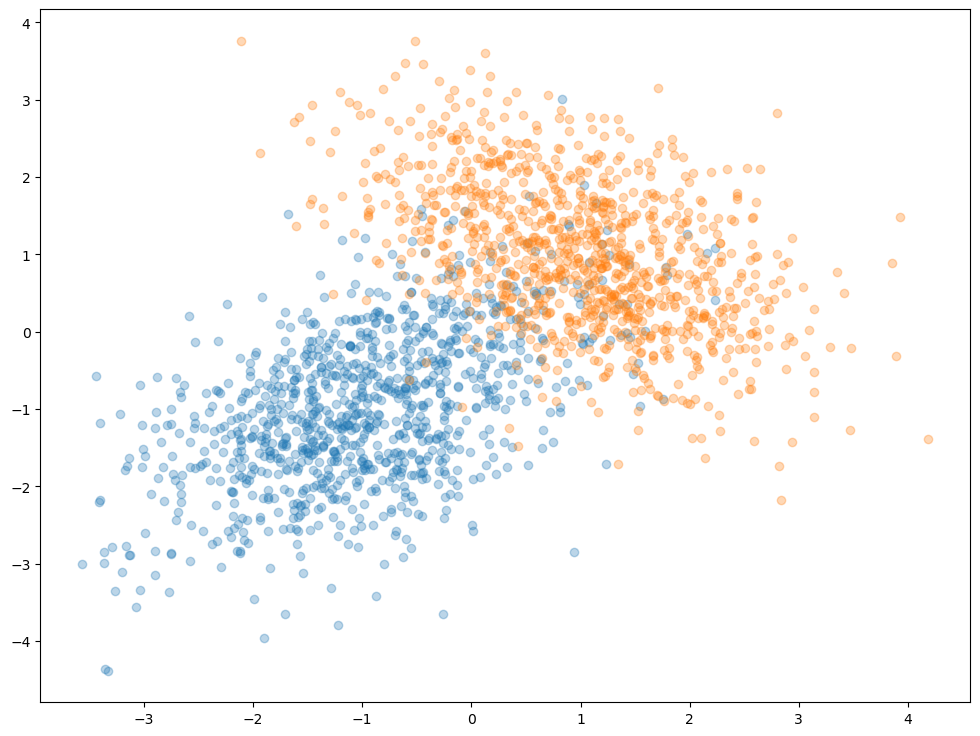

In [48]:
N = 1000
plt.figure(figsize=(12,9))
signal = np.random.multivariate_normal([-1.0,-1.0],[[1.0,0.5],[0.5,1.0]],(N,))

bckgrd = np.random.multivariate_normal([1.0,1.0],[[1.0,-0.5],[-0.5,1.0]],(N,))

print(signal.shape, bckgrd.shape)
plot_data(signal, bckgrd)

We calculate Fisher's discriminant:
$$ \vec{d} = \frac{\vec{\mu}_S - \vec{\mu}_B}{\Sigma_S + \Sigma_B}$$

In [50]:
fisher

array([-0.96120342, -0.99806552])

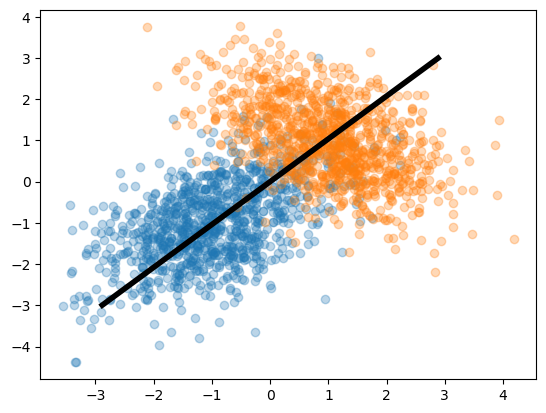

In [49]:
from numpy.linalg import inv
numerator = np.mean(signal, axis=0) - np.mean(bckgrd, axis=0)
denominator = np.cov(signal.T) + np.cov(bckgrd.T)
fisher = np.dot(inv(denominator), numerator)

plot_data(signal, bckgrd, fisher=fisher)

## Example 2: Neural Network

** Feed Forward **
$$ a_h = \sum_i w_{hi} x_i $$
$$ x_h = \tanh{a_h}$$
$$ a_o = \sum_h w_{oh} x_h $$
$$ x_o = \tanh{a_o}$$

**Backpropagation Algorithm**

$$\frac{\mathrm{d}E}{\mathrm{d}w} = \frac{\partial E}{\partial x} \cdot \frac{\partial x}{\partial a} \cdot \frac{\partial a}{\partial w}$$

** Output Layer **
$$E \left( x_o \right) = \frac{1}{2} \left( x_o - t \right)^2 $$

** Hidden Layer **
$$E \left( x_h \right) = E \left( x_o(x_h) \right)$$

In [ ]:
class NeuralNetwork(object):
    def __init__(self, n_input, n_hidden):
        self.w_hi = np.random.normal(size=(n_input, n_hidden))
        self.w_oh = np.random.normal(size=n_hidden)

    def fit(self, x_i, t):
        for step in range(1, 1000):
            # Propagate input through hidden and output layer
            a_h = np.dot(x_i, self.w_hi)
            x_h = np.tanh(a_h)
            a_o = np.dot(x_h, self.w_oh)
            x_o = np.tanh(a_o)
            # Back-Propagate error signal
            d = lambda x: 4*np.cosh(x)**2/(np.cosh(2*x) + 1)**2
            e_o = d(a_o)*(x_o - t)
            e_h = d(a_h)*np.outer(e_o, self.w_oh)
            # Update weights
            self.w_oh -= 0.01 * np.dot(e_o.T, x_h)
            self.w_hi -= 0.01 * np.dot(x_i.T, e_h)

    def predict(self, x_i):
        # Propagate input trough hidden layer
        x_h = np.tanh(np.dot(x_i, self.w_hi))
        # Propagate output of hidden layer through output layer
        return np.tanh(np.dot(x_h, self.w_oh))

In [ ]:
nn = NeuralNetwork(2, 4)
nn.fit(np.vstack([signal, bckgrd]),
       np.hstack([np.ones(N), -np.ones(N)]))
plot_data(signal, bckgrd, neuralnet=nn)

## Exercise 


#### Task 1

Calculate $\pi$ using the formula of Leibniz
$$ 4 \cdot \sum_{k=1}^\infty \frac{(-1)^{k+1}}{2 k - 1}$$


#### Task 2

Check the central limit theorem by adding 100 uniformly distributed numbers between 0, 1.
$$ y = \sum_{i=1}^{100} x_i$$ 

Do this 10000 times, standardise the obtained values $y' = \frac{y - \mu_y}{\sigma_y}$ and plot the histogram using
```
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_array)
```

Compare the distribution with 10000 random numbers directly drawn from np.random.normal.


#### Task 3

Implement the sieve of Eratosthenes to find all the prime numbers up to 1000 without using any Python loops

Hint: My personal solution is a one-liner and uses the following three functions:
  * `np.arange`
  * `np.sum`
  * `np.remainder.outer`